# Support Vector Machine (SVM) with Different Kernels

This notebook demonstrates the application of Support Vector Machines (SVM) with different kernel functions on a non-linearly separable XOR-like dataset. We'll explore:
- Linear kernel (expected to fail due to non-linear nature of XOR)
- Polynomial kernel
- RBF (Radial Basis Function) kernel
- Sigmoid kernel

The goal is to visualize how different kernels handle the non-linear decision boundary of the XOR problem.

In [1]:
from sklearn.svm import SVC
import numpy as np
import matplotlib.pyplot as plt
import random

## Data Generation

We'll create a synthetic XOR-like dataset with some Gaussian noise:
- Class 0: Points around (1,1) and (5,5)
- Class 1: Points around (1,5) and (5,1)
- Added Gaussian noise with σ=0.4

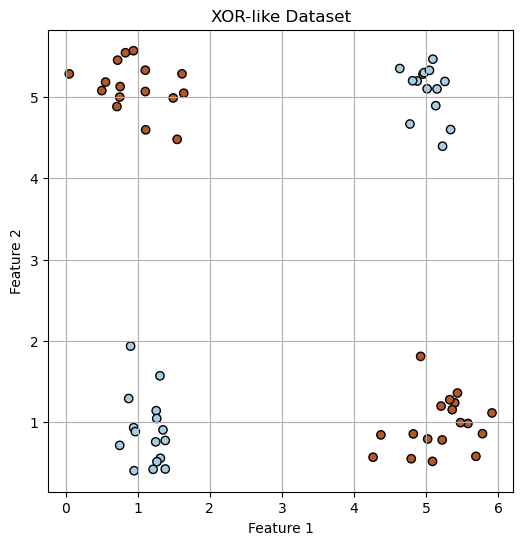

In [2]:
def generate_xor_data(n=20, test_ratio=0.2, random_seed=42):
    random.seed(random_seed)
    data = []
    for _ in range(n):
        data.append(([1 + random.gauss(0, 0.4), 1 + random.gauss(0, 0.4)], 0))
        data.append(([5 + random.gauss(0, 0.4), 5 + random.gauss(0, 0.4)], 0))
    for _ in range(n):
        data.append(([1 + random.gauss(0, 0.4), 5 + random.gauss(0, 0.4)], 1))
        data.append(([5 + random.gauss(0, 0.4), 1 + random.gauss(0, 0.4)], 1))
    random.shuffle(data)
    split_idx = int(len(data) * (1 - test_ratio))
    return data[:split_idx], data[split_idx:]

# Generate XOR data
train_data, test_data = generate_xor_data(n=20)
X_train = np.array([d[0] for d in train_data])
y_train = np.array([d[1] for d in train_data])

# Visualize the raw data
plt.figure(figsize=(6, 6))
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=plt.cm.Paired, edgecolors='k')
plt.title("XOR-like Dataset")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.grid(True)
plt.show()

## Comparing Different Kernels

Let's train SVM with different kernels and visualize their decision boundaries:
1. Linear kernel (expected to fail due to non-linear separability)
2. Polynomial kernel
3. RBF kernel (usually works best for this type of problem)
4. Sigmoid kernel

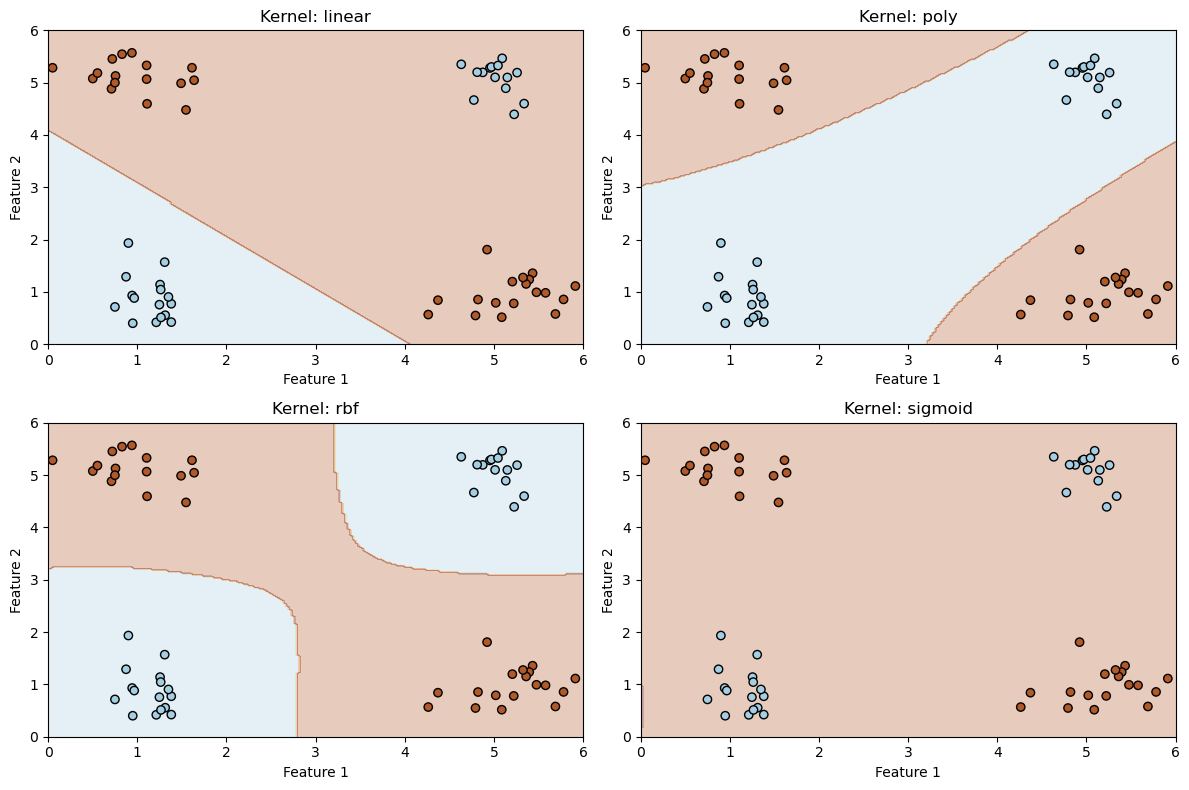

Training Accuracy for each kernel:
    Linear kernel: 78.12%
      Poly kernel: 100.00%
       Rbf kernel: 100.00%
   Sigmoid kernel: 53.12%


In [3]:
kernels = ['linear', 'poly', 'rbf', 'sigmoid']
plt.figure(figsize=(12, 8))

for i, kernel in enumerate(kernels, 1):
    clf = SVC(kernel=kernel, gamma=0.5, C=1.0)
    clf.fit(X_train, y_train)
    
    # Plot decision boundary
    xx, yy = np.meshgrid(np.linspace(0, 6, 200), np.linspace(0, 6, 200))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)
    
    plt.subplot(2, 2, i)
    plt.contourf(xx, yy, Z, alpha=0.3, cmap=plt.cm.Paired)
    plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=plt.cm.Paired, edgecolors='k')
    plt.title(f"Kernel: {kernel}")
    plt.xlabel("Feature 1")
    plt.ylabel("Feature 2")

plt.tight_layout()
plt.show()

# Print training accuracy for each kernel
print("Training Accuracy for each kernel:")
for kernel in kernels:
    clf = SVC(kernel=kernel, gamma=0.5, C=1.0)
    clf.fit(X_train, y_train)
    accuracy = clf.score(X_train, y_train)
    print(f"{kernel.capitalize():>10} kernel: {accuracy:.2%}")

## Exploring Sigmoid Kernel Parameters

The sigmoid kernel has two important parameters:
- gamma: Controls the "reach" of a single training example
- coef0 (c): Shifts the decision boundary

Let's visualize how different combinations of these parameters affect the decision boundary.

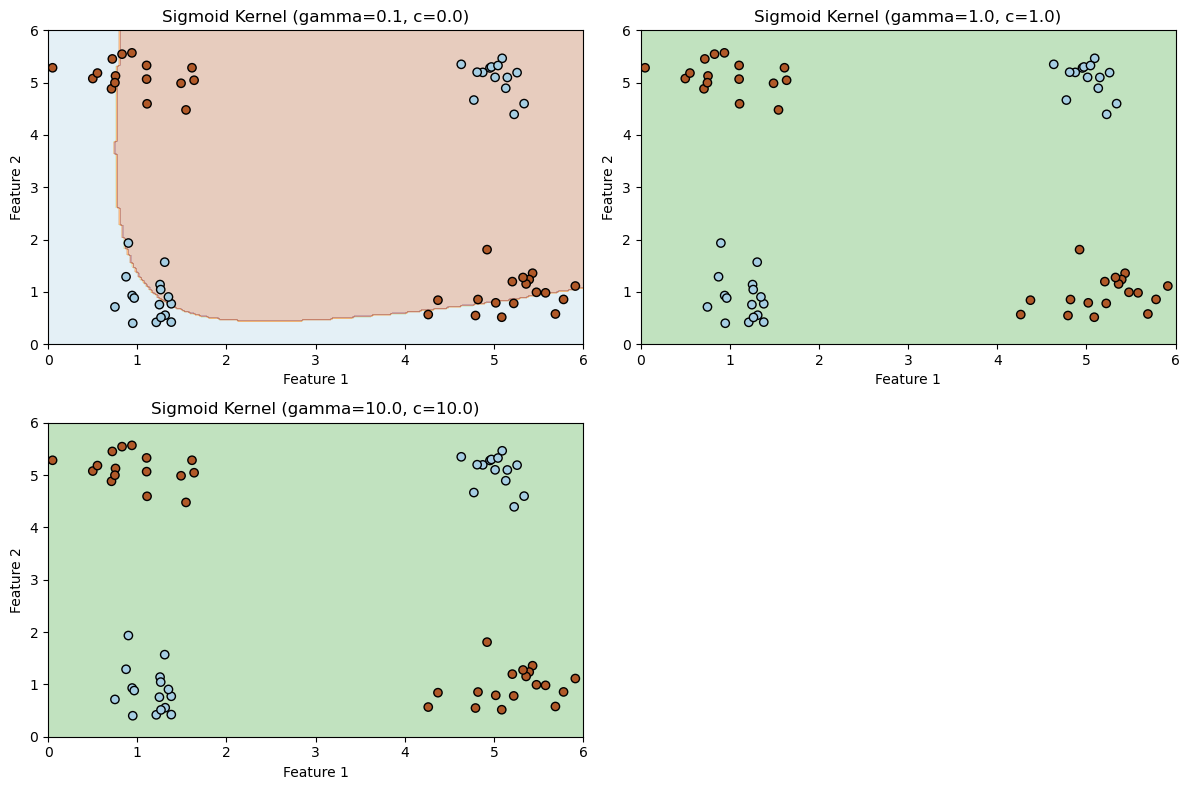

Training Accuracy for different sigmoid kernel parameters:
gamma= 0.1, c= 0.0: 46.88%
gamma= 1.0, c= 1.0: 53.12%
gamma=10.0, c=10.0: 53.12%


In [5]:
# Sigmoid kernel with different parameters
gammas = [0.1, 1.0, 10.0]
cs = [0.0, 1.0, 10.0]

plt.figure(figsize=(12, 8))
for i, (gamma, c) in enumerate(zip(gammas, cs), 1):
    clf = SVC(kernel='sigmoid', gamma=gamma, coef0=c)
    clf.fit(X_train, y_train)
    
    # Plot decision boundary
    xx, yy = np.meshgrid(np.linspace(0, 6, 200), np.linspace(0, 6, 200))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)
    
    plt.subplot(2, 2, i)
    plt.contourf(xx, yy, Z, alpha=0.3, cmap=plt.cm.Paired)
    plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=plt.cm.Paired, edgecolors='k')
    plt.title(f"Sigmoid Kernel (gamma={gamma}, c={c})")
    plt.xlabel("Feature 1")
    plt.ylabel("Feature 2")

plt.tight_layout()
plt.show()

# Print training accuracy for each parameter combination
print("Training Accuracy for different sigmoid kernel parameters:")
for gamma, c in zip(gammas, cs):
    clf = SVC(kernel='sigmoid', gamma=gamma, coef0=c)
    clf.fit(X_train, y_train)
    accuracy = clf.score(X_train, y_train)
    print(f"gamma={gamma:4.1f}, c={c:4.1f}: {accuracy:.2%}")

## Conclusions

From our experiments, we can observe that:
1. The linear kernel fails to separate the classes due to the non-linear nature of the XOR problem
2. The polynomial kernel performs better as it can capture non-linear relationships
3. The RBF kernel typically provides the best results for this type of problem
4. The sigmoid kernel's performance heavily depends on its parameters (gamma and coef0)

This demonstrates why kernel selection and parameter tuning are crucial steps in applying SVMs to real-world problems.